## Reto 3: Describiendo histogramas

### 1. Objetivos:
    - Generar histogramas y caracterizarlos utilizando las herramientas que hemos aprendido hasta el momento

---
    
### 2. Desarrollo:

#### a) Pima Indians Diabetes Database

Vamos a analizar un conjunto de datos que contiene datos acerca del estado de salud de mujeres mayores de 21 años de ascendencia [pima](https://es.wikipedia.org/wiki/Pueblo_pima). El conjunto también tiene una columna 'outcome' que indica si las pacientes fueron diagnosticadas con diabetes o no. Puedes ver la descripción completa [aquí](https://www.kaggle.com/uciml/pima-indians-diabetes-database).  El dataset está guardado con el nombre de `diabetes-clean.csv`.

- Todas las variables independientes en este dataset son numéricas. Genera histogramas de todas las variables independientes para observar la distribución de estas variables. Un valor aceptable para el número de `bins` es `50`. Después de generar el histograma, caracterízalo con una descripción utilizando los términos que has aprendido en esta sesión.

- Intenta también discernir a simple vista la asimetría y curtosis de tus histogramas, y después confirma tus hipótesis utilizando las funciones `kurtosis` y `skew` del módulo `scipy.stats`.

- Ve si te es posible identificar la cantidad y magnitud de los valores atípicos usando histogramas. ¿Cuál ha sido la técnica que te ha facilitado más la identificación de valores atípicos? ¿Boxplots, tablas de frecuencias o histogramas?

Comenta con la experta y con tus compañeros por qué crees que esas variables tengan la distribución que tienen.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import skew, kurtosis

from google.colab import drive
drive.mount('/content/drive')

sn.set(style='white')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataScience/Remoto Datasets/Remoto diabetes-clean.csv')
df = df.drop('Unnamed: 0', axis=1)

<Axes: xlabel='pregnancies', ylabel='Count'>

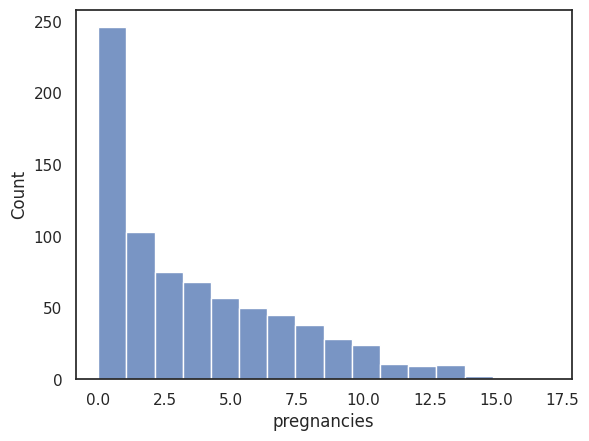

In [ ]:
cols = list(df.keys())
sn.histplot(df[cols[0]], kde=False)

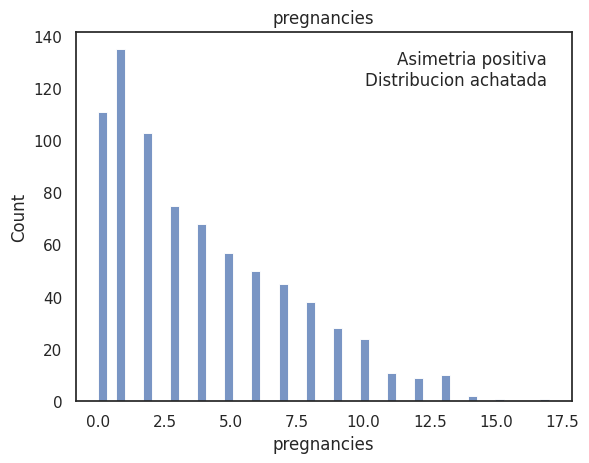

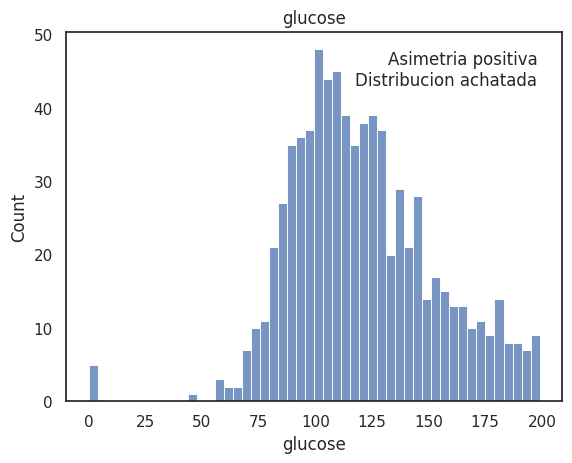

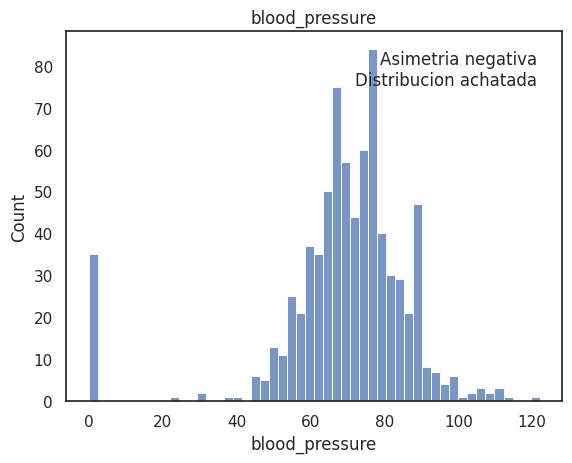

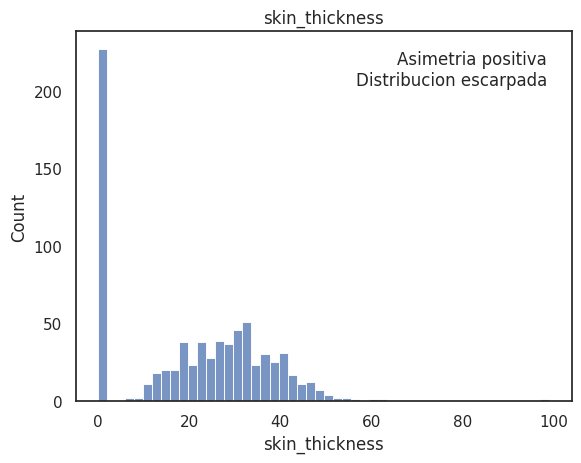

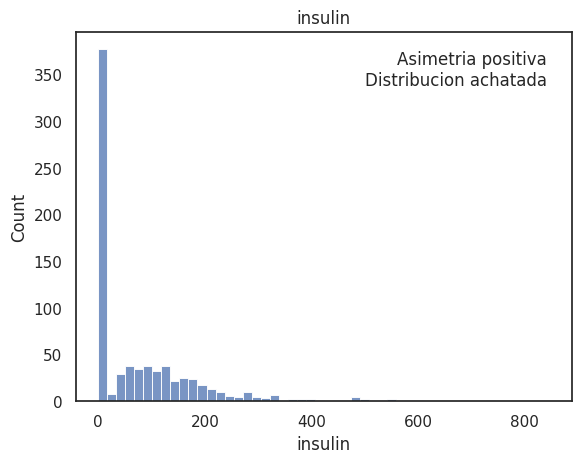

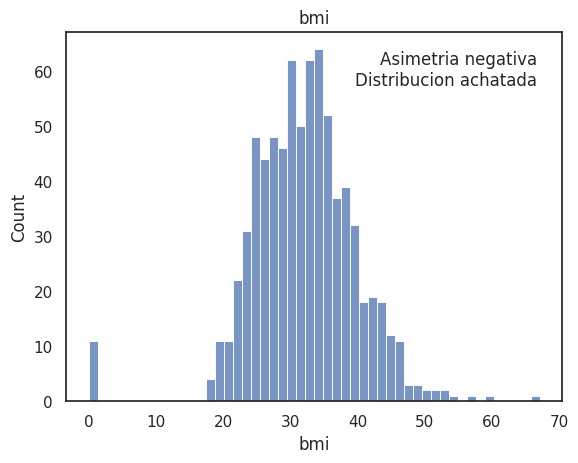

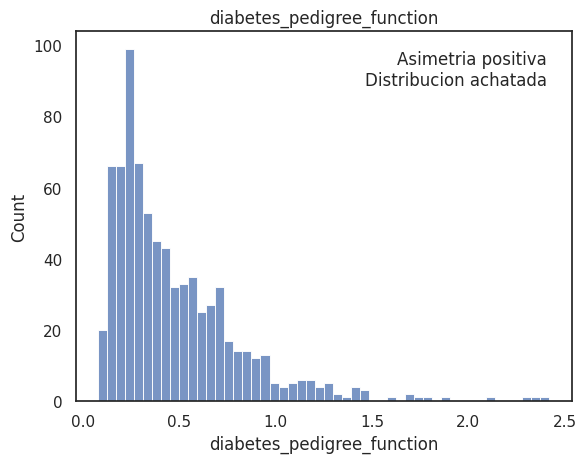

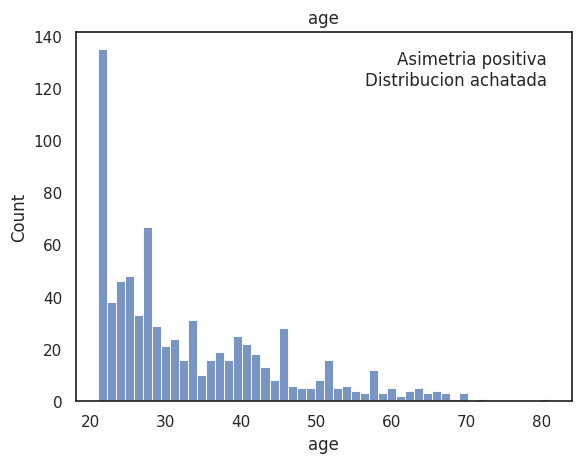

In [12]:
figs = []
cols = list(df.keys())
l = len(cols)
for i in range(l-1):
  figs.append(plt.figure(i))
  sn.histplot(df[cols[i]], kde=False, bins=50).set(title=cols[i])

  skw = skew(df[cols[i]])
  kurt = kurtosis(df[cols[i]])
  if skw==0:
    skwStr = 'nula'
  elif skw>0:
    skwStr = 'positiva'
  else:
    skwStr = 'negativa'

  if kurt==0:
    kurtStr = 'normal'
  elif kurt>0:
    kurtStr = 'achatada'
  else:
    kurtStr = 'escarpada'

  plt.gca().text(0.95, 0.95,f'Asimetria {skwStr}\nDistribucion {kurtStr}', transform=plt.gca().transAxes, fontsize=12, va='top', ha='right') #add text



# Atypical values in extreme bins with few counts.